In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import pandas as pd
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
df = pd.read_csv('../data/train-balanced-sarcasm.csv', encoding='utf8', on_bad_lines='skip')
summary = pd.read('summary.csv')

# When Sentiment Analysis fails
<div>
<img src="img/rand_digits.png" width="500"/>
<img src="img/rand_page.png" width="500"/>
</div>

In [2]:
comments = [
    "This is a lovely book. I would recommend it to anyone",
    "This book is just a list of numbers. Useless.",
    "OMG, what a suspenseful read",
    "More interesting than the Bible",
    "This is, without a doubt, a more touching story than twilight",
    "A great read. Captivating. I couldn’t put it down anymore, when I have found out that 0.629 is there",
]

tokens = [tokenizer.encode(comment, return_tensors="pt") for comment in comments]
results = [model(token) for token in tokens]
classes = [torch.argmax(result.logits) for result in results]
classes

[tensor(4), tensor(0), tensor(4), tensor(4), tensor(4), tensor(4)]

# Sarcasm detection is needed

In [48]:
from simpletransformers.classification import ClassificationModel
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

model = ClassificationModel(
    "roberta", "../models/robertatwitter_reddit/checkpoint-1000", use_cuda=False
)

In [52]:
pred, _ = model.predict(comments)
pred

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[0, 0, 0, 0]

### Dataset
- Twitter (60K data, unbalanced)
- MUSTARD (small data available)
- Reddit (1M data, balanced)

<AxesSubplot: title={'center': 'Distribution of Reddit dataset'}, ylabel='Frequency'>

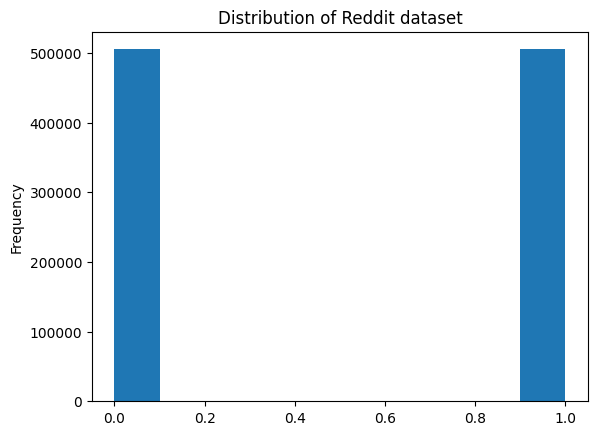

In [10]:

df['label'].plot(kind='hist', title='Distribution of Reddit dataset')

### Model
- RoBERTa sentence representation
- pretrained models used:
    1. https://huggingface.co/cardiffnlp/twitter-roberta-base-irony
    2. https://huggingface.co/jkhan447/sarcasm-detection-RoBerta-base-POS

### Hardware Spec


<pre> 
Architecture:                    x86_64 
CPU op-mode(s):                  32-bit, 64-bit
Byte Order:                      Little Endian
Address sizes:                   46 bits physical, 48 bits virtual
CPU(s):                          32
On-line CPU(s) list:             0-31
Thread(s) per core:              2
Core(s) per socket:              8
Socket(s):                       2
NUMA node(s):                    2
Vendor ID:                       GenuineIntel
CPU family:                      6
Model:                           63
Model name:                      Intel(R) Xeon(R) CPU E5-2630 v3 @ 2.40GHz
Stepping:                        2
CPU MHz:                         2596.774
CPU max MHz:                     3200.0000
CPU min MHz:                     1200.0000
BogoMIPS:                        4794.04
Virtualization:                  VT-x
RAM:                             32GB
OS:                              Ubuntu 20.04.5 LTS (virtualized lxc container on Ubuntu 18.04.6 LTS host machine)  
</pre>

### Evaluation



## References
- Bharti, Gupta, Shukla, Hatamleh, Tarazi, Nuagah, Multimodal Sarcasm Detection: A Deep Learning Approach
- Oprea, Magdy, iSarcasm: A Dataset of Intended Sarcasm 
- Hamed Yaghoobian, Hamid R. Arabnia, Khaled Rasheed: Sarcasm Detection: A Comparative Study
- Kumar, Anand, Transformers on Sarcasm Detection with Context
- https://www.projectpro.io/article/bert-nlp-model-explained/558



Special thanks for the Romanian Orthodox Church for (unknowingly) providing computational resources
<div>
<img src="img/ikon.png" width="500"/>
<br>
<a href="http://museikon.ro">
http://museikon.ro
</a>
</div>